# Grabbing a Random Point from a Non-Uniform Probability Distribution
## Given a maxwell boltzman curve, this program will convert it into distribution weights and output the result.
### To use, the value *T* is the average temprature
### Adjust the value *size* depending on the location of the graph
### Adjust the value *m* depending on the mass

0.9935262420090648
4000


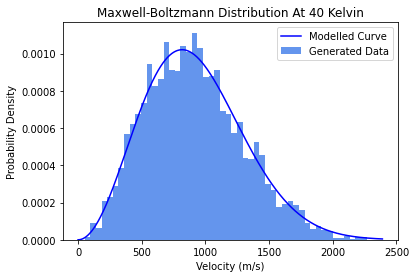

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def randomMB(T,count):
    pi = 3.1415
    m = 1
    a_kg = 1.66054*(10**-27)
    k = 1.381*10**(-23)

    e = 2.71
    size = 2400
    def maxwellBoltzMann(v):
        exponent = (-((.5*m*a_kg*(v**2))/(k*T)))
        term_1 = ((m*a_kg/(2*pi*k*T))**1.5)
        curve = term_1*(4*pi*(v**2)*(e**exponent))
        return curve
    y = []

    size = 2400
    x_c = np.linspace(0,size,num= round(.99*size))
    # x_c = np.linspace(0,40000,num= 39820)
    y = []
    # Takes an input velocity and returns the probability distribution
    for i in range(len(x_c)):
        y.append(maxwellBoltzMann(x_c[i]))
        # print(((-.5*m*(v**2))/(k*T)))
    print(np.sum(y))
    y[i] += 1-np.sum(y)
    # the sum of y had to be equal to one, but due to computer rounding errors it wasn't. I picked an interpolation that provided just under 1, and then added the remainder to the end. This was filtered out later
    # Above is the modelled curve
    s = np.random.choice(x_c,p=y,size=count)
    # Calculates the raw data
    s = np.delete(s,np.where(s > size-100))
    if len(s)<count:
        difference = count - len(s)
        while (difference != 0):
            temp = np.random.choice(x_c,p=y,size=difference)
            s = np.concatenate((s,temp))
            difference = count - len(s)
    # Filters out extraneous data from previous repair
    x_c = x_c[:(len(x_c)-10)]
    y= y[:(len(y)-10)]
    return s,x_c,y
T = 40
fig, ax = plt.subplots(1, 1)
distribution =(randomMB(T,4000))
plt.plot(distribution[1],distribution[2],label = 'Modelled Curve', color = 'b')
count, bins, ignored = plt.hist(distribution[0], 50, density=True, label = 'Generated Data', color = 'cornflowerblue')
print(len(distribution[0]))
plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability Density')
plt.title("Maxwell-Boltzmann Distribution At " + str(T) + " Kelvin")
plt.legend(loc = 'best')
# delete all particles with a velocity above 800
# Objective- Turn this into a function that takes a temprature, and number of velocities, and returns an array with all those velocities. Due to the filtering, the program will need to run multiple times through the loop until it reaches only valid velocities